In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\Project work\11. Customer Churn Analysis\Customer Churn.csv")

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [107]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [109]:
# change data type
df['TotalCharges']=df['TotalCharges'].replace(" ","0")
df['TotalCharges']=df['TotalCharges'].astype(float)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [111]:
df.isnull().sum().sum()

np.int64(0)

In [112]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [113]:
df.duplicated(["customerID"]).sum()

np.int64(0)

In [114]:
# Converted 0 and 1 values to yes or no to make it easier to understand.
def conv(value):
    if value==1:
        return "Yes"
    else:
        return "No"
        

In [115]:
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

In [116]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA

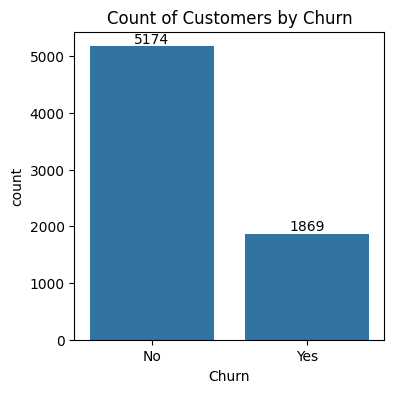

In [117]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Churn",data=df)

for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Count of Customers by Churn")
plt.show()

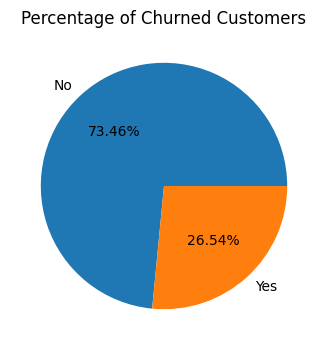

,Churn
Churn,
No,5174
Yes,1869


In [118]:
plt.figure(figsize=(4,4))
gb=df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb['Churn'], labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of Churned Customers")
plt.show()
gb

**From the given pie chart we can conclude that 26.54% of cutomers have churned out.**


**Now lets explore the reason behind it.**

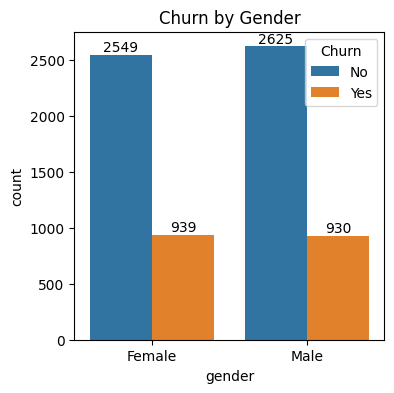

In [119]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='gender',data=df,hue='Churn')

for bars in ax.containers:
    plt.bar_label(bars)
plt.title("Churn by Gender")
plt.show()

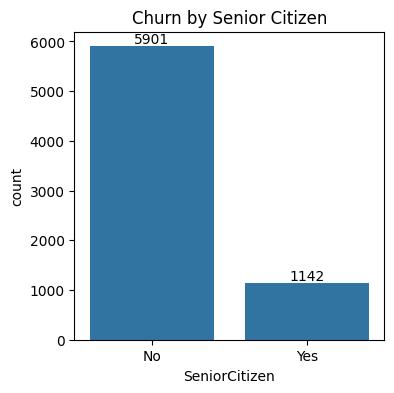

In [120]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='SeniorCitizen',data=df)

for bars in ax.containers:
    plt.bar_label(bars)
plt.title("Churn by Senior Citizen")
plt.show()

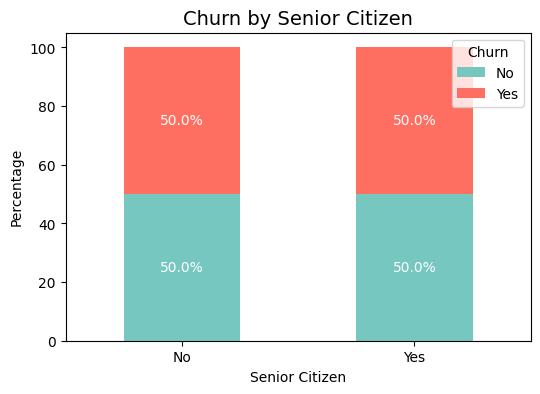

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame
data = {
    'SeniorCitizen': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
    'Churn': ['Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No']
}
df = pd.DataFrame(data)

# Calculate percentages
stacked_data = (
    df.groupby(['SeniorCitizen', 'Churn'])
    .size()
    .unstack(fill_value=0)
)

stacked_data_percentage = (stacked_data.T / stacked_data.T.sum()).T * 100

# Plot stacked bar chart
stacked_data_percentage.plot(
    kind='bar',
    stacked=True,
    figsize=(6, 4),
    color=['#76c7c0', '#ff6f61']
)

# Add percentage labels
for i, row in stacked_data_percentage.iterrows():
    cumulative = 0
    for col in stacked_data_percentage.columns:
        plt.text(
            i, 
            cumulative + row[col] / 2,  # Position the label in the middle of the stack
            f"{row[col]:.1f}%", 
            ha='center', 
            va='center', 
            color='white', 
            fontsize=10
        )
        cumulative += row[col]

plt.title("Churn by Senior Citizen", fontsize=14)
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)
plt.legend(title="Churn", loc="upper right")
plt.show()


**Comparative a greated percentage of people in senior citizen category have churned.**

In [123]:
sns.countplot(x="tenure",data=df)
plt.show()

ValueError: Could not interpret value `tenure` for `x`. An entry with this name does not appear in `data`.

In [124]:
df.columns

Index(['SeniorCitizen', 'Churn'], dtype='object')

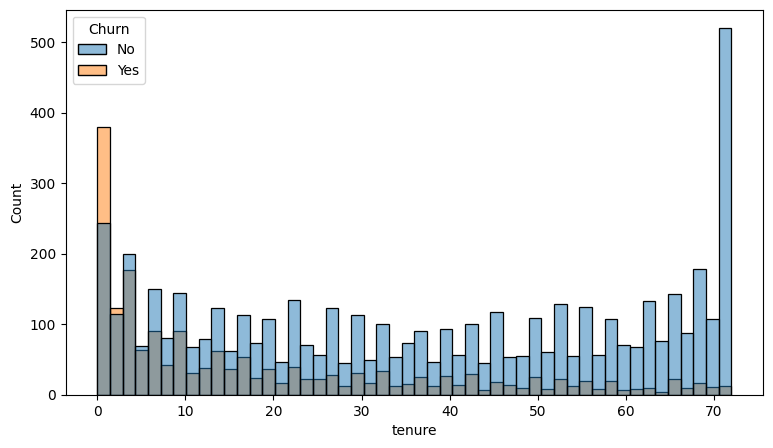

In [6]:
plt.figure(figsize=(9,5))
sns.histplot(x='tenure',data=df,bins=50,hue="Churn")
plt.show()